#Data collection : This data set is from kagggle and its contains the data form netflix

In [194]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
df = pd.read_csv('/content/netflix.csv')

In [196]:
df

,title,genre,language,imdb_score,premiere,runtime,year
0,Notes for My Son,Drama,Spanish,6.3,11/24/2020,83,2020
1,"To Each, Her Own",Romantic comedy,French,5.3,6/24/2018,95,2018
2,The Lovebirds,Romantic comedy,English,6.1,5/22/2020,87,2020
3,The Perfection,Horror-thriller,English,6.1,5/24/2019,90,2019
4,Happy Anniversary,Romantic comedy,English,5.8,3/30/2018,78,2018
...,...,...,...,...,...,...,...
578,Rolling Thunder Revue: A bob Dylan Story by Ma...,Documentary,English,7.6,6/12/2019,144,2019
579,Freaks: You're One of Us,Supernatural drama,German,5.4,9/2/2020,92,2020
580,Squared Love,Romantic comedy,Polish,5.0,2/11/2021,102,2021
581,My Own Man,Documentary,English,6.4,12/13/2014,81,2014


In [197]:
df.isnull().sum()

title         0
genre         0
language      0
imdb_score    0
premiere      0
runtime       0
year          0
dtype: int64

In [198]:
# Convert 'premiere' column to datetime
df['premiere'] = pd.to_datetime(df['premiere'])

In [199]:
df.describe()

,imdb_score,premiere,runtime,year
count,583.000000,583,583.000000,583.000000
mean,6.275129,2019-06-19 17:02:34.373927936,93.490566,2018.934820
min,2.500000,2014-12-13 00:00:00,4.000000,2014.000000
25%,5.700000,2018-06-26 12:00:00,86.000000,2018.000000
50%,6.400000,2019-10-16 00:00:00,97.000000,2019.000000
75%,7.000000,2020-09-19 12:00:00,107.500000,2020.000000
max,9.000000,2021-05-27 00:00:00,209.000000,2021.000000
std,0.976678,NaN,27.706665,1.474598


In [200]:
df['genre'].value_counts()

genre
Documentary                    159
Drama                           77
Comedy                          49
Romantic comedy                 39
Thriller                        33
                              ... 
Political thriller               1
Fantasy                          1
Romantic comedy-drama            1
Animation/Musical/Adventure      1
Supernatural drama               1
Name: count, Length: 114, dtype: int64

In [201]:
df['language'].value_counts()

language
English                       401
Hindi                          32
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Korean                          6
Japanese                        6
English/Spanish                 5
German                          5
Turkish                         5
Polish                          3
Dutch                           3
Marathi                         3
Filipino                        2
Thai                            2
English/Japanese                2
English/Hindi                   2
English/Mandarin                2
English/Korean                  1
Khmer/English/French            1
English/Akan                    1
Bengali                         1
English/Swedish                 1
English/Arabic                  1
English/Taiwanese/Mandarin      1
Norwegian                       1
Tamil                           1
Engli

In [202]:
df

,title,genre,language,imdb_score,premiere,runtime,year
0,Notes for My Son,Drama,Spanish,6.3,2020-11-24,83,2020
1,"To Each, Her Own",Romantic comedy,French,5.3,2018-06-24,95,2018
2,The Lovebirds,Romantic comedy,English,6.1,2020-05-22,87,2020
3,The Perfection,Horror-thriller,English,6.1,2019-05-24,90,2019
4,Happy Anniversary,Romantic comedy,English,5.8,2018-03-30,78,2018
...,...,...,...,...,...,...,...
578,Rolling Thunder Revue: A bob Dylan Story by Ma...,Documentary,English,7.6,2019-06-12,144,2019
579,Freaks: You're One of Us,Supernatural drama,German,5.4,2020-09-02,92,2020
580,Squared Love,Romantic comedy,Polish,5.0,2021-02-11,102,2021
581,My Own Man,Documentary,English,6.4,2014-12-13,81,2014


In [203]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
578    False
579    False
580    False
581    False
582    False
Length: 583, dtype: bool

In [204]:
df.shape

(583, 7)

Text(0.5, 0, 'language')

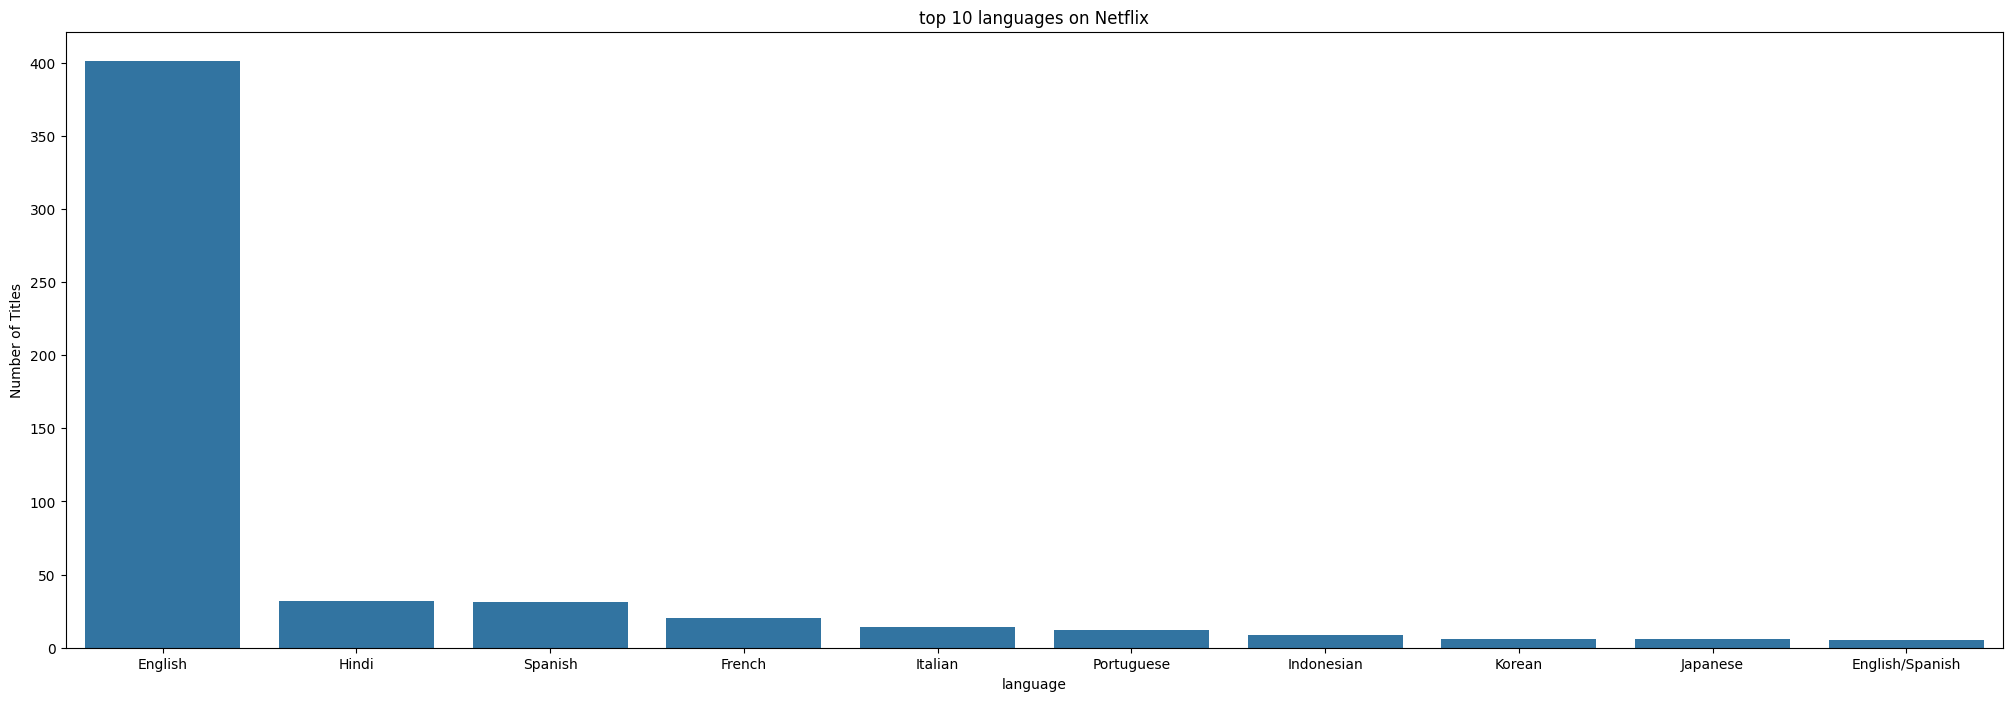

In [205]:
Top_10_languages = df['language'].value_counts().head(10)
plt.figure(figsize=(25, 8))
sns.barplot(x=Top_10_languages.index, y = Top_10_languages.values)
plt.title('Top 10 Languages on Netflix')
plt.xlabel('language')
plt.ylabel('Number of Titles')
plt.xticks(rotation=360)
plt.title('top 10 languages on Netflix')
plt.xlabel('language')



In [206]:
df['year'] = df['premiere'].dt.year

In [207]:
language_counts = df.groupby(['year', 'language']).size().reset_index(name = 'stream_count')

In [208]:
top_languages_yearwise = language_counts.groupby('year').apply(lambda x: x.nlargest(10, 'stream_count')).reset_index(drop=True)


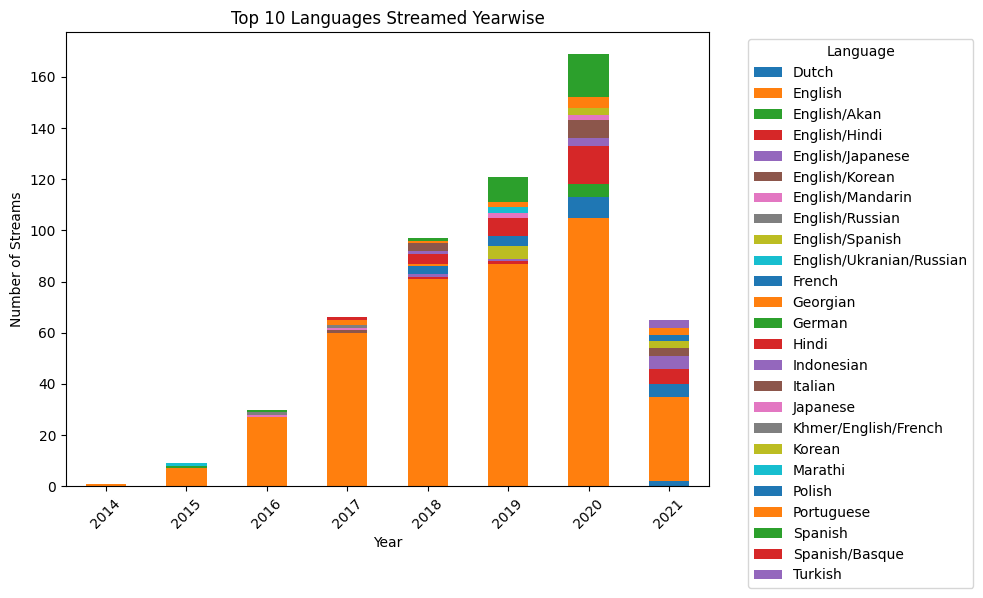

In [209]:
pivot_df = top_languages_yearwise.pivot(index='year', columns='language', values='stream_count')
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Top 10 Languages Streamed Yearwise')
plt.xlabel('Year')
plt.ylabel('Number of Streams')
plt.xticks(rotation=45)
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [210]:
df.columns

Index(['title', 'genre', 'language', 'imdb_score', 'premiere', 'runtime',
       'year'],
      dtype='object')

In [211]:
df['title'].value_counts()

title
Notes for My Son                           1
ReMastered: The Miami Showband Massacre    1
The Day of the Lord                        1
Milestone                                  1
Sardar Ka Grandson                         1
                                          ..
To All the Boys I've Loved Before          1
Tribhanga ? Tedhi Medhi Crazy              1
Team Foxcatcher                            1
The Players                                1
Biggie: I Got a Story to Tell              1
Name: count, Length: 583, dtype: int64

In [212]:
df['title'].unique()

array(['Notes for My Son', 'To Each, Her Own', 'The Lovebirds',
       'The Perfection', 'Happy Anniversary', 'Why Did You Kill Me?',
       'Death to 2020', 'Brene Brown: The Call to Courage',
       'Operation Christmas Drop',
       'The Lonely Island Presents: The Unauthorized Bash Brothers Experience',
       'Porta dos Fundos: The First Temptation of Christ',
       'El Pepe: A Supreme Life', 'Sky Ladder: The Art of Cai Guo-Qiang',
       'Out of Many, One', 'If Anything Happens I Love You', 'Polar',
       'Shimmer Lake', 'In the Tall Grass', 'Pieces of a Woman',
       'The Knight Before Christmas', 'Unicorn Store',
       'Our Souls at Night', 'Birders', 'Christmas Crossfire',
       'Shawn Mendes: In Wonder', 'Game Over, Man!', 'Icarus',
       'Forgive Us Our Debts', 'Clinical', 'Crazy About Her',
       'Night in Paradise', 'Parchis: The Documentary',
       'The Siege of Jadotville', 'I Am All Girls',
       'Fyre: The Greatest Party That Never Happened',
       'In the Sh

#DATA VISUALIZATION

#year wise distribution of premier

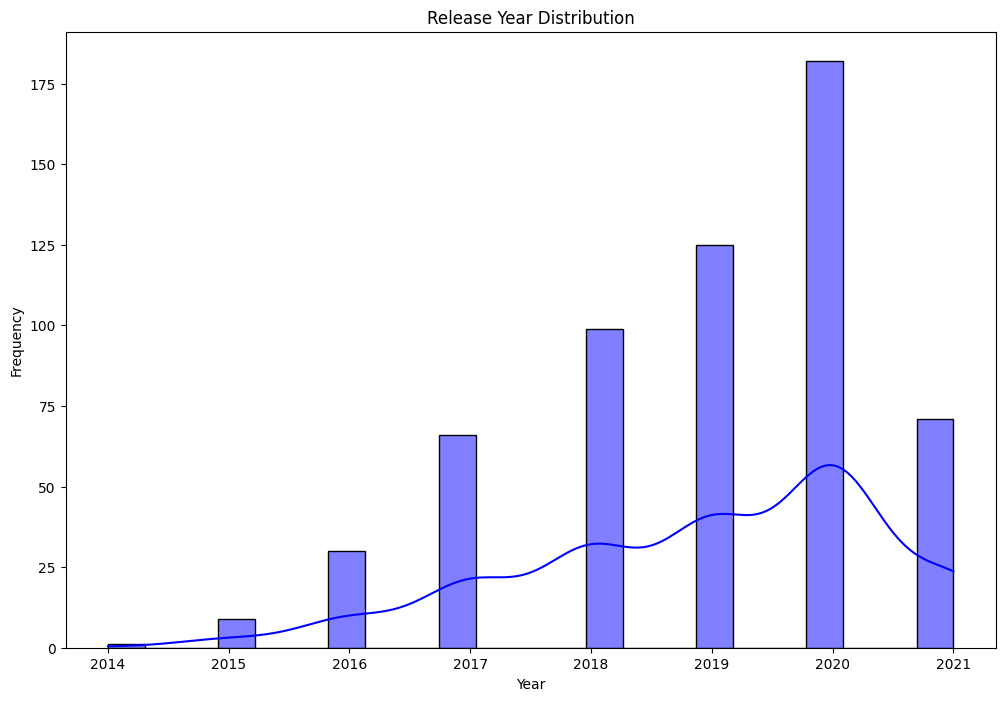

In [213]:
plt.figure(figsize=(12, 8))
sns.histplot(df['year'], bins=23, kde=True, color='blue')
plt.title('Release Year Distribution')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

#realtionship between imdb score and year

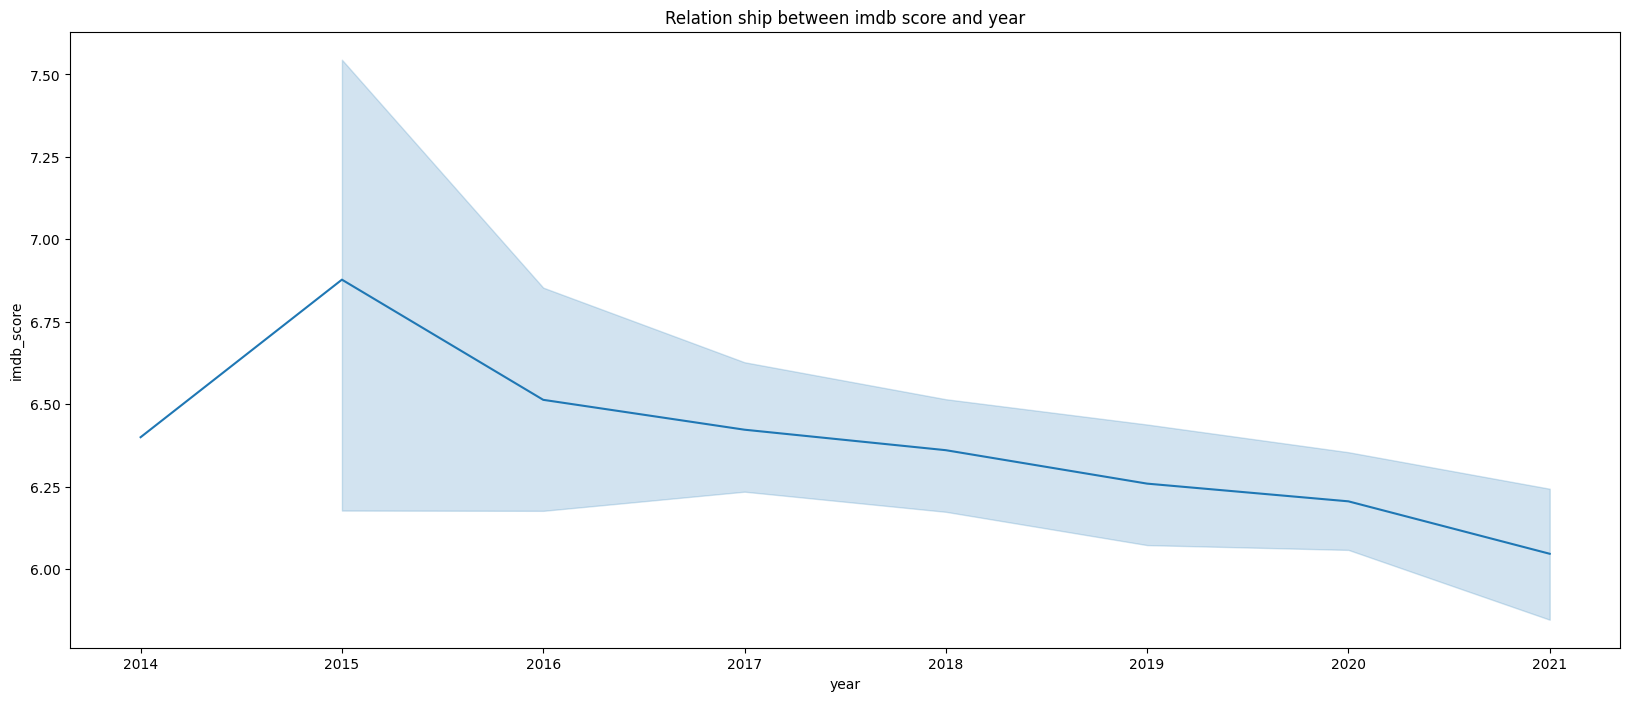

In [214]:
plt.figure(figsize=(20,8))
sns.lineplot(x =df['year'], y=df['imdb_score'])
plt.title('Relation ship between imdb score and year')
plt.xlabel('year')
plt.ylabel('imdb_score')
plt.show()

In [215]:
Top_7_languages = df['language'].value_counts().head(7).index.tolist()
Top_7_df = df[df['language'].isin(Top_7_languages)]

In [216]:
colors = sns.color_palette('muted', n_colors=len(Top_7_df))

#top 7 languges based on imbd score

<ipython-input-217-1dc42abe43ee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Top_7_df,x ='imdb_score',y = 'language',palette=colors)
<ipython-input-217-1dc42abe43ee>:2: UserWarning: The palette list has more values (519) than needed (7), which may not be intended.
  sns.barplot(data=Top_7_df,x ='imdb_score',y = 'language',palette=colors)


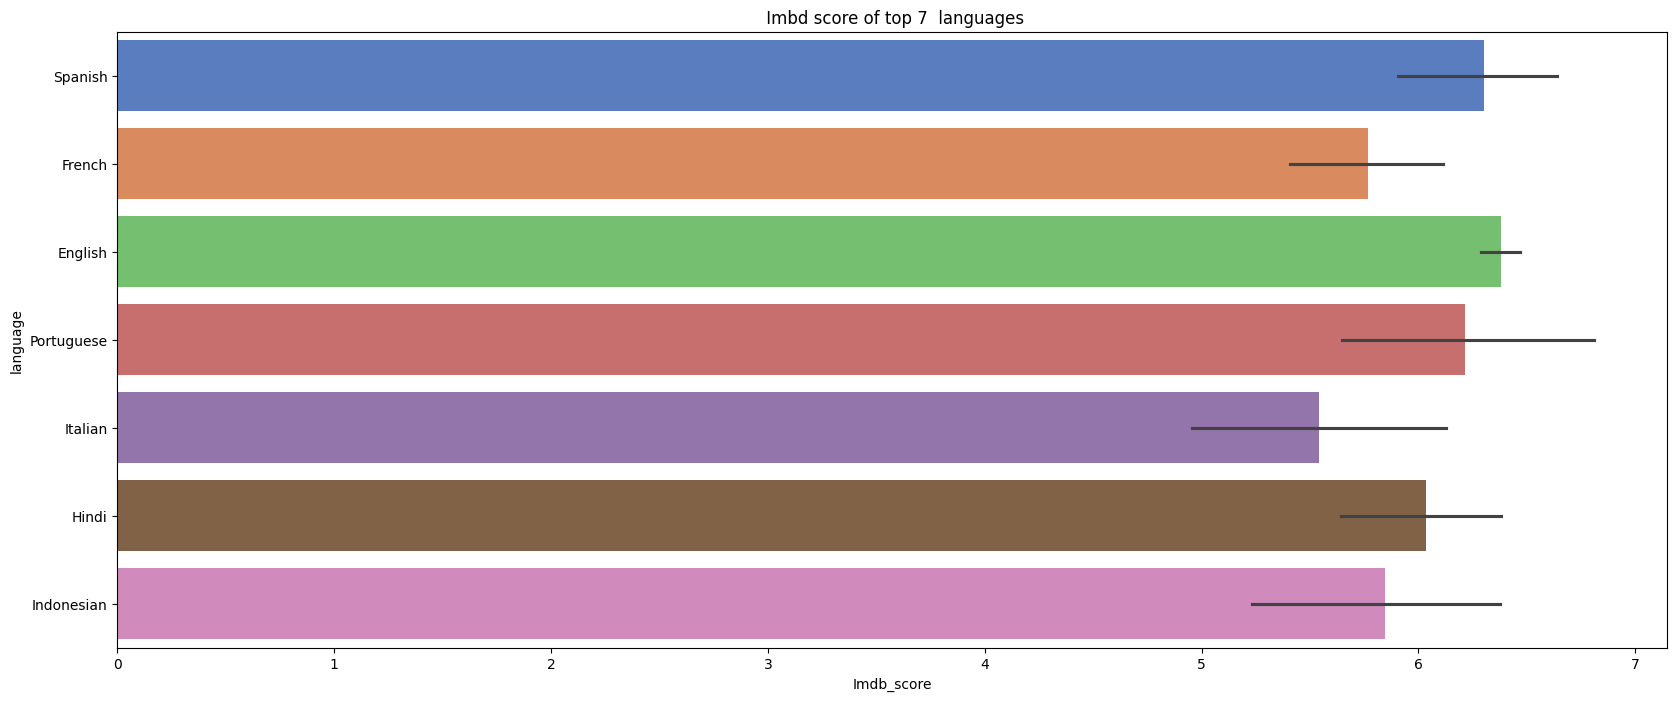

In [217]:
plt.figure(figsize=(20,8))
sns.barplot(data=Top_7_df,x ='imdb_score',y = 'language',palette=colors)
plt.title(' Imbd score of top 7  languages')
plt.xlabel('Imdb_score')
plt.ylabel('language')
plt.show()

#most popular genre (movie,shows) on netflix based on imdb score

<ipython-input-218-e7a1c8cb0e99>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values,palette ='muted')


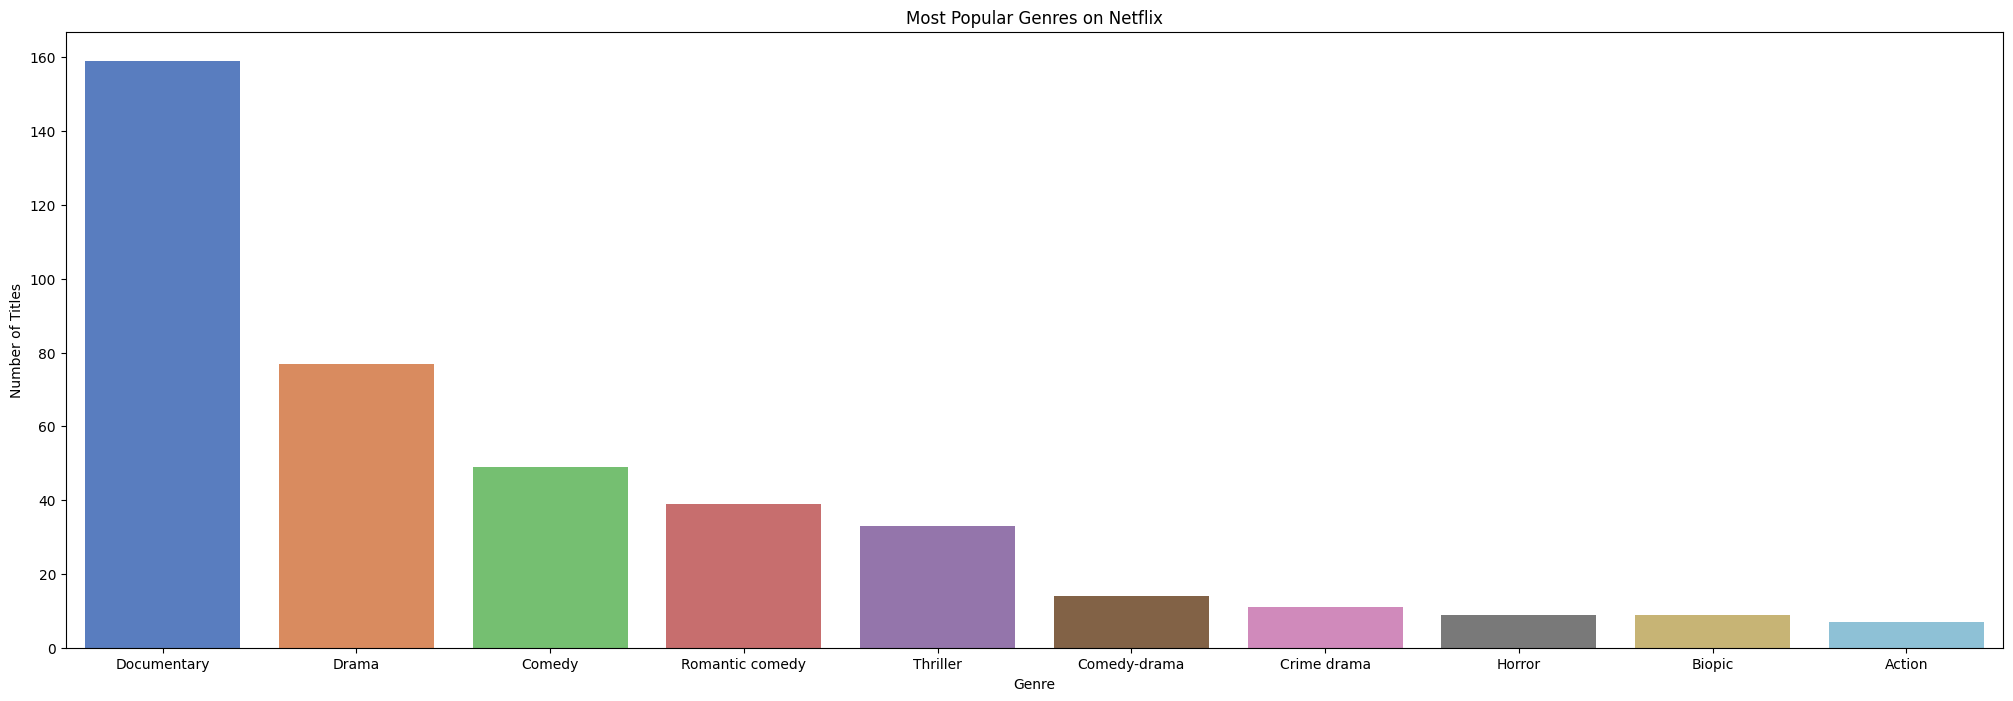

In [218]:
top_genres = df['genre'].value_counts().head(10)
plt.figure(figsize=(25, 8))
sns.barplot(x=top_genres.index, y=top_genres.values,palette ='muted')
plt.title('Most Popular Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.show()


#average score by year

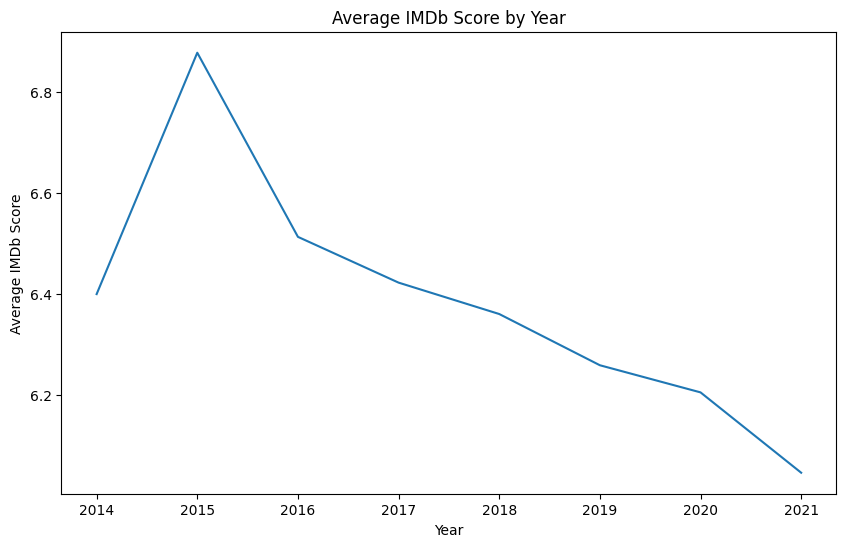

In [219]:

yearly_average_scores = df.groupby('year')['imdb_score'].mean()
plt.figure(figsize=(10, 6))
plt.plot(yearly_average_scores.index, yearly_average_scores.values)
plt.title('Average IMDb Score by Year')
plt.xlabel('Year')
plt.ylabel('Average IMDb Score')
plt.show()

In [220]:
df['genre'].value_counts()

genre
Documentary                    159
Drama                           77
Comedy                          49
Romantic comedy                 39
Thriller                        33
                              ... 
Political thriller               1
Fantasy                          1
Romantic comedy-drama            1
Animation/Musical/Adventure      1
Supernatural drama               1
Name: count, Length: 114, dtype: int64

In [221]:
value_counts = df['language'].value_counts()

In [222]:
value_counts

language
English                       401
Hindi                          32
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Korean                          6
Japanese                        6
English/Spanish                 5
German                          5
Turkish                         5
Polish                          3
Dutch                           3
Marathi                         3
Filipino                        2
Thai                            2
English/Japanese                2
English/Hindi                   2
English/Mandarin                2
English/Korean                  1
Khmer/English/French            1
English/Akan                    1
Bengali                         1
English/Swedish                 1
English/Arabic                  1
English/Taiwanese/Mandarin      1
Norwegian                       1
Tamil                           1
Engli

In [223]:
languages_to_remove = [
    'English/Japanese',
    'English/Hindi',
    'English/Mandarin',
    'English/Korean',
    'Khmer/English/French',
    'English/Akan',
    'English/Swedish',
    'English/Arabic',
    'English/Taiwanese/Mandarin',
    'English/Ukranian/Russian',
    'Spanish/Catalan',
    'English/Russian',
    'Spanish/English',
    'Thia/English',
    'Spanish/Basque'
]

df = df[~df['language'].isin(languages_to_remove)]

In [224]:
df.columns

Index(['title', 'genre', 'language', 'imdb_score', 'premiere', 'runtime',
       'year'],
      dtype='object')

In [225]:

df = pd.get_dummies(df, columns=['language', 'genre'], dtype=int)


In [226]:
df

,title,imdb_score,premiere,runtime,year,language_Bengali,language_Dutch,language_English,language_English/Spanish,language_Filipino,...,genre_Teen comedy-drama,genre_Thriller,genre_Urban fantasy,genre_Variety Show,genre_Variety show,genre_War,genre_War drama,genre_War-Comedy,genre_Western,genre_Zombie/Heist
0,Notes for My Son,6.3,2020-11-24,83,2020,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"To Each, Her Own",5.3,2018-06-24,95,2018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Lovebirds,6.1,2020-05-22,87,2020,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Perfection,6.1,2019-05-24,90,2019,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Happy Anniversary,5.8,2018-03-30,78,2018,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,Rolling Thunder Revue: A bob Dylan Story by Ma...,7.6,2019-06-12,144,2019,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
579,Freaks: You're One of Us,5.4,2020-09-02,92,2020,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
580,Squared Love,5.0,2021-02-11,102,2021,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581,My Own Man,6.4,2014-12-13,81,2014,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
df = df.drop(['premiere'],axis = 1)

In [228]:
df

,title,imdb_score,runtime,year,language_Bengali,language_Dutch,language_English,language_English/Spanish,language_Filipino,language_French,...,genre_Teen comedy-drama,genre_Thriller,genre_Urban fantasy,genre_Variety Show,genre_Variety show,genre_War,genre_War drama,genre_War-Comedy,genre_Western,genre_Zombie/Heist
0,Notes for My Son,6.3,83,2020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"To Each, Her Own",5.3,95,2018,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,The Lovebirds,6.1,87,2020,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Perfection,6.1,90,2019,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Happy Anniversary,5.8,78,2018,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,Rolling Thunder Revue: A bob Dylan Story by Ma...,7.6,144,2019,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
579,Freaks: You're One of Us,5.4,92,2020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
580,Squared Love,5.0,102,2021,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581,My Own Man,6.4,81,2014,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [229]:
top_titles = df['title'].value_counts().head(10).index.tolist()

for title in top_titles:
    df[f'title_{title.replace(" ", "_")}'] = (df['title'] == title).astype(int)

df.drop(columns=['title'], inplace=True)
print(df.head())


   imdb_score  runtime  year  language_Bengali  language_Dutch  \
0         6.3       83  2020                 0               0   
1         5.3       95  2018                 0               0   
2         6.1       87  2020                 0               0   
3         6.1       90  2019                 0               0   
4         5.8       78  2018                 0               0   

   language_English  language_English/Spanish  language_Filipino  \
0                 0                         0                  0   
1                 0                         0                  0   
2                 1                         0                  0   
3                 1                         0                  0   
4                 1                         0                  0   

   language_French  language_Georgian  ...  title_Notes_for_My_Son  \
0                0                  0  ...                       1   
1                1                  0  ...            

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [231]:
X = df.drop(columns=['imdb_score'])
y = df['imdb_score']

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24)

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.7064745607901064


In [234]:
pip install numpy pandas matplotlib scikit-learn tensorflow


In [249]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1,1))

train_size = int(len(X_scaled) * 0.7)
test_size = len(X_scaled) - train_size

X_train, X_test = X_scaled[0:train_size,:], X_scaled[train_size:len(X_scaled),:]
y_train, y_test = y_scaled[0:train_size,:], y_scaled[train_size:len(y_scaled),:]

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='RMSprop')

history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_test, y_test), verbose=2, shuffle=False)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform(y_test)

train_score = sqrt(mean_squared_error(y_train, train_predict))
print('Train Score: %.2f RMSE' % train_score)

test_score = sqrt(mean_squared_error(y_test_inv, test_predict))
print('Test Score: %.2f RMSE' % test_score)

train_mae = mean_absolute_error(y_train, train_predict)
print('Train MAE: %.2f' % train_mae)

test_mae = mean_absolute_error(y_test_inv, test_predict)
print('Test MAE: %.2f' % test_mae)


Epoch 1/150
7/7 - 3s - loss: 0.3138 - val_loss: 0.2253 - 3s/epoch - 444ms/step
Epoch 2/150
7/7 - 0s - loss: 0.2022 - val_loss: 0.1523 - 54ms/epoch - 8ms/step
Epoch 3/150
7/7 - 0s - loss: 0.1360 - val_loss: 0.1005 - 52ms/epoch - 7ms/step
Epoch 4/150
7/7 - 0s - loss: 0.0883 - val_loss: 0.0635 - 53ms/epoch - 8ms/step
Epoch 5/150
7/7 - 0s - loss: 0.0552 - val_loss: 0.0396 - 58ms/epoch - 8ms/step
Epoch 6/150
7/7 - 0s - loss: 0.0348 - val_loss: 0.0266 - 53ms/epoch - 8ms/step
Epoch 7/150
7/7 - 0s - loss: 0.0245 - val_loss: 0.0213 - 52ms/epoch - 7ms/step
Epoch 8/150
7/7 - 0s - loss: 0.0205 - val_loss: 0.0196 - 63ms/epoch - 9ms/step
Epoch 9/150
7/7 - 0s - loss: 0.0190 - val_loss: 0.0189 - 50ms/epoch - 7ms/step
Epoch 10/150
7/7 - 0s - loss: 0.0181 - val_loss: 0.0185 - 66ms/epoch - 9ms/step
Epoch 11/150
7/7 - 0s - loss: 0.0175 - val_loss: 0.0181 - 54ms/epoch - 8ms/step
Epoch 12/150
7/7 - 0s - loss: 0.0169 - val_loss: 0.0179 - 50ms/epoch - 7ms/step
Epoch 13/150
7/7 - 0s - loss: 0.0165 - val_loss: 

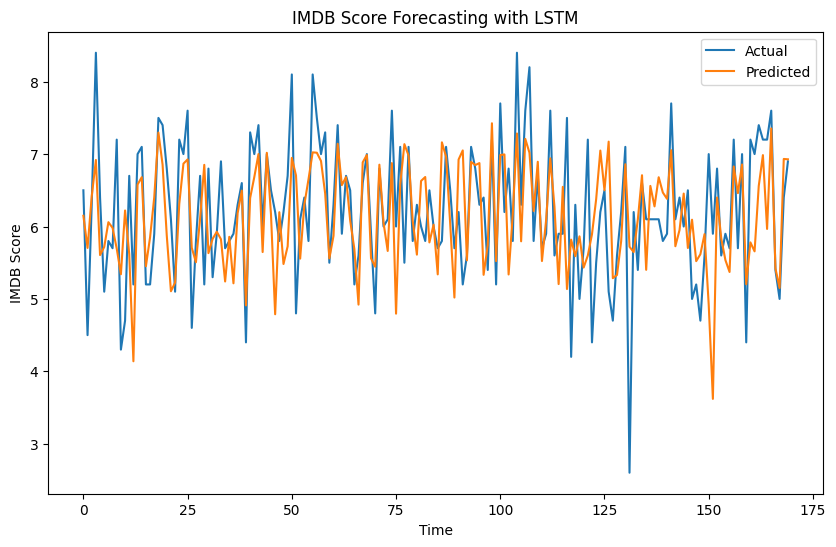

In [250]:
plt.figure(figsize=(10,6))

plt.plot(y_test_inv, label='Actual')
plt.plot(test_predict, label='Predicted')

plt.title('IMDB Score Forecasting with LSTM')
plt.xlabel('Time')
plt.ylabel('IMDB Score')
plt.legend()
plt.show()

Epoch 1/100
8/8 - 3s - loss: 0.2856 - val_loss: 0.2204 - 3s/epoch - 315ms/step
Epoch 2/100
8/8 - 0s - loss: 0.2051 - val_loss: 0.1522 - 80ms/epoch - 10ms/step
Epoch 3/100
8/8 - 0s - loss: 0.1387 - val_loss: 0.0973 - 54ms/epoch - 7ms/step
Epoch 4/100
8/8 - 0s - loss: 0.0861 - val_loss: 0.0570 - 53ms/epoch - 7ms/step
Epoch 5/100
8/8 - 0s - loss: 0.0491 - val_loss: 0.0324 - 72ms/epoch - 9ms/step
Epoch 6/100
8/8 - 0s - loss: 0.0281 - val_loss: 0.0222 - 54ms/epoch - 7ms/step
Epoch 7/100
8/8 - 0s - loss: 0.0202 - val_loss: 0.0206 - 69ms/epoch - 9ms/step
Epoch 8/100
8/8 - 0s - loss: 0.0190 - val_loss: 0.0212 - 70ms/epoch - 9ms/step
Epoch 9/100
8/8 - 0s - loss: 0.0188 - val_loss: 0.0206 - 74ms/epoch - 9ms/step
Epoch 10/100
8/8 - 0s - loss: 0.0177 - val_loss: 0.0193 - 56ms/epoch - 7ms/step
Epoch 11/100
8/8 - 0s - loss: 0.0164 - val_loss: 0.0181 - 72ms/epoch - 9ms/step
Epoch 12/100
8/8 - 0s - loss: 0.0155 - val_loss: 0.0175 - 53ms/epoch - 7ms/step
Epoch 13/100
8/8 - 0s - loss: 0.0148 - val_loss:

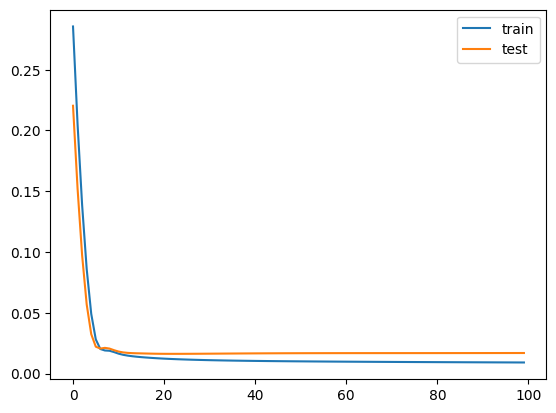

4/4 [==============================] - 0s 3ms/step
Train Score: 0.61 RMSE
Test Score: 0.83 RMSE


In [237]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1,1))

train_size = int(len(X_scaled) * 0.8)
test_size = len(X_scaled) - train_size
X_train, X_test = X_scaled[0:train_size,:], X_scaled[train_size:len(X_scaled),:]
y_train, y_test = y_scaled[0:train_size,:], y_scaled[train_size:len(y_scaled),:]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=2, shuffle=False)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform(y_test)
from math import sqrt
train_score = sqrt(mean_squared_error(y_train_inv, train_predict))
print('Train Score: %.2f RMSE' % (train_score))
test_score = sqrt(mean_squared_error(y_test_inv, test_predict))
print('Test Score: %.2f RMSE' % (test_score))

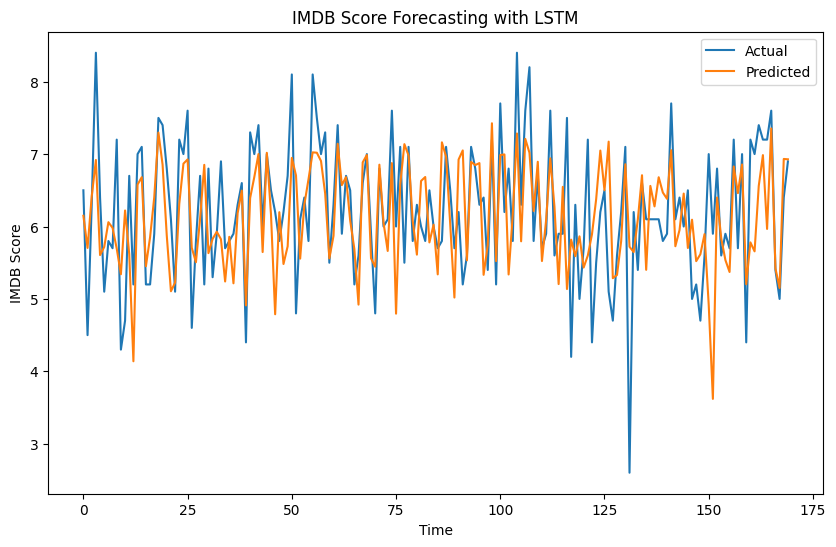

In [251]:
plt.figure(figsize=(10,6))

plt.plot(y_test_inv, label='Actual')
plt.plot(test_predict, label='Predicted')

plt.title('IMDB Score Forecasting with LSTM')
plt.xlabel('Time')
plt.ylabel('IMDB Score')
plt.legend()
plt.show()